In [6]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 2. Load Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv(url, names=columns)

# 3. Prepare data
X = df.drop('letter', axis=1)
y = df['letter']

# Encode labels (A-Z) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Build Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(16,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 6. Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 7. Make some Predictions
predictions = model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Show few predictions
for i in range(5):
    actual_label = label_encoder.inverse_transform([y_test[i]])[0]
    predicted_label = label_encoder.inverse_transform([predicted_classes[i]])[0]
    print(f"\nSample {i+1}:")
    print(f"Actual Letter: {actual_label}")
    print(f"Predicted Letter: {predicted_label}")


Epoch 1/20
400/400 [==============================] - 4s 5ms/step - loss: 1.5990 - accuracy: 0.5752 - val_loss: 0.8989 - val_accuracy: 0.7513
Epoch 2/20
400/400 [==============================] - 2s 4ms/step - loss: 0.7308 - accuracy: 0.7904 - val_loss: 0.6678 - val_accuracy: 0.8028
Epoch 3/20
400/400 [==============================] - 2s 4ms/step - loss: 0.5613 - accuracy: 0.8343 - val_loss: 0.5247 - val_accuracy: 0.8494
Epoch 4/20
400/400 [==============================] - 2s 4ms/step - loss: 0.4577 - accuracy: 0.8642 - val_loss: 0.4419 - val_accuracy: 0.8650
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3869 - accuracy: 0.8873 - val_loss: 0.3848 - val_accuracy: 0.8859
Epoch 6/20
400/400 [==============================] - 2s 6ms/step - loss: 0.3352 - accuracy: 0.8992 - val_loss: 0.3513 - val_accuracy: 0.8900
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2963 - accuracy: 0.9121 - val_loss: 0.3187 - val_accuracy: 0.9025
Epoch 

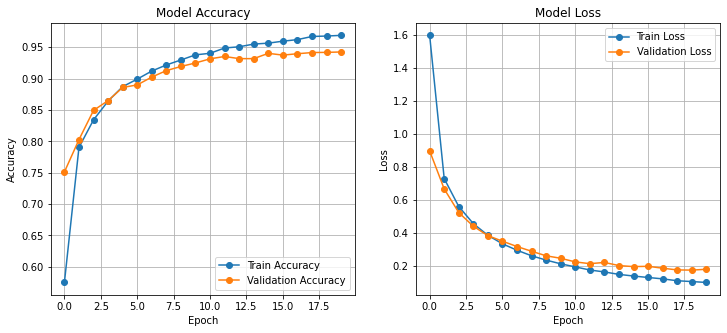

In [7]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [8]:
# Save the model
model.save('letter_classification_model.h5')
print("Model Saved Successfully!")

Model Saved Successfully!


C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Load the model
loaded_model = keras.models.load_model('letter_classification_model.h5')

# Evaluate again (optional)
loss, acc = loaded_model.evaluate(X_test, y_test)
print(f"\nLoaded Model Test Accuracy: {acc:.4f}")


125/125 [==============================] - 1s 4ms/step - loss: 0.1699 - accuracy: 0.9480

Loaded Model Test Accuracy: 0.9480


Epoch 1/30
125/125 [==============================] - 2s 9ms/step - loss: 2.1599 - accuracy: 0.3898 - val_loss: 1.2685 - val_accuracy: 0.6718
Epoch 2/30
125/125 [==============================] - 1s 7ms/step - loss: 1.3102 - accuracy: 0.6022 - val_loss: 0.9145 - val_accuracy: 0.7542
Epoch 3/30
125/125 [==============================] - 1s 7ms/step - loss: 1.0920 - accuracy: 0.6596 - val_loss: 0.7709 - val_accuracy: 0.7797
Epoch 4/30
125/125 [==============================] - 1s 8ms/step - loss: 0.9606 - accuracy: 0.6985 - val_loss: 0.6840 - val_accuracy: 0.8008
Epoch 5/30
125/125 [==============================] - 1s 6ms/step - loss: 0.8715 - accuracy: 0.7271 - val_loss: 0.6194 - val_accuracy: 0.8192
Epoch 6/30
125/125 [==============================] - 1s 6ms/step - loss: 0.8005 - accuracy: 0.7449 - val_loss: 0.5640 - val_accuracy: 0.8395
Epoch 7/30
125/125 [==============================] - 1s 6ms/step - loss: 0.7567 - accuracy: 0.7598 - val_loss: 0.5209 - val_accuracy: 0.8547
Epoch 

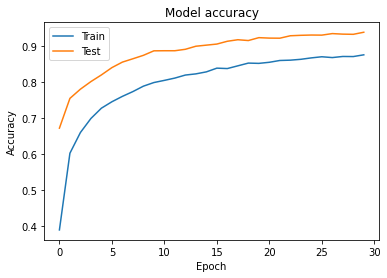

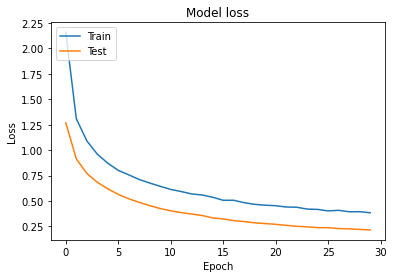

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler

# Load the OCR letter dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

data = pd.read_csv(url, names=columns)

# Separate features and labels
X = data.drop('letter', axis=1).values
y = data['letter'].values

# Encode labels (A=0, B=1, ..., Z=25)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Normalize the features (very important for DNN)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=26)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))  # 16 features
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26, activation='softmax'))  # 26 output classes (A-Z)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 30

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
